# Innovacer Data Science Assignment
### Task B : Build a regression model to predict the recurrence time for patients whose outcome is R.

In [1]:
import pandas as pd  
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline
#------------------------------------------------------------------------
from sklearn_pandas import DataFrameMapper
from sklearn import metrics, datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_excel('Input.xlsx',header=0,na_values = "?")
dataset = data.copy()
dataset.shape

(198, 35)

In [3]:
#Checking for presence of NA values and dropping if any
dataset.isna().sum()
dataset = dataset.dropna()
print(dataset.shape)
#---------------------Logistic Regression----------------------------
data.isna().sum()
data = data.dropna()
data.shape

(194, 35)


(194, 35)

In [4]:
#Logistic
y = data['Outcome']
print(y.shape)

(194,)


In [5]:
#Selecting the data rows in which the disease has recurred.
dataset = dataset[dataset['Outcome'] != 'N']
print(dataset.shape)

(46, 35)


In [6]:
dataset = dataset.drop('Outcome', 1)
dataset = dataset.drop('ID', 1)
#--------------Logistic----------------------
data = data.drop('Outcome', 1)
data = data.drop('ID', 1)
data = data.drop('Time', 1)

In [7]:
print(dataset.shape) #Linear 
print(data.shape)    #Logistic

(46, 33)
(194, 32)


## Exploratory Data Analysis

Number of Recurring Cases:  46
Number of Non-Recurring Cases:  148


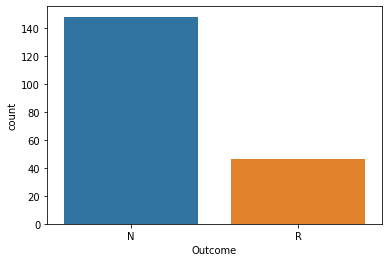

In [8]:
ax = sns.countplot(y,label="Count")
N, R = y.value_counts()
print('Number of Recurring Cases: ', R)
print('Number of Non-Recurring Cases: ',N)

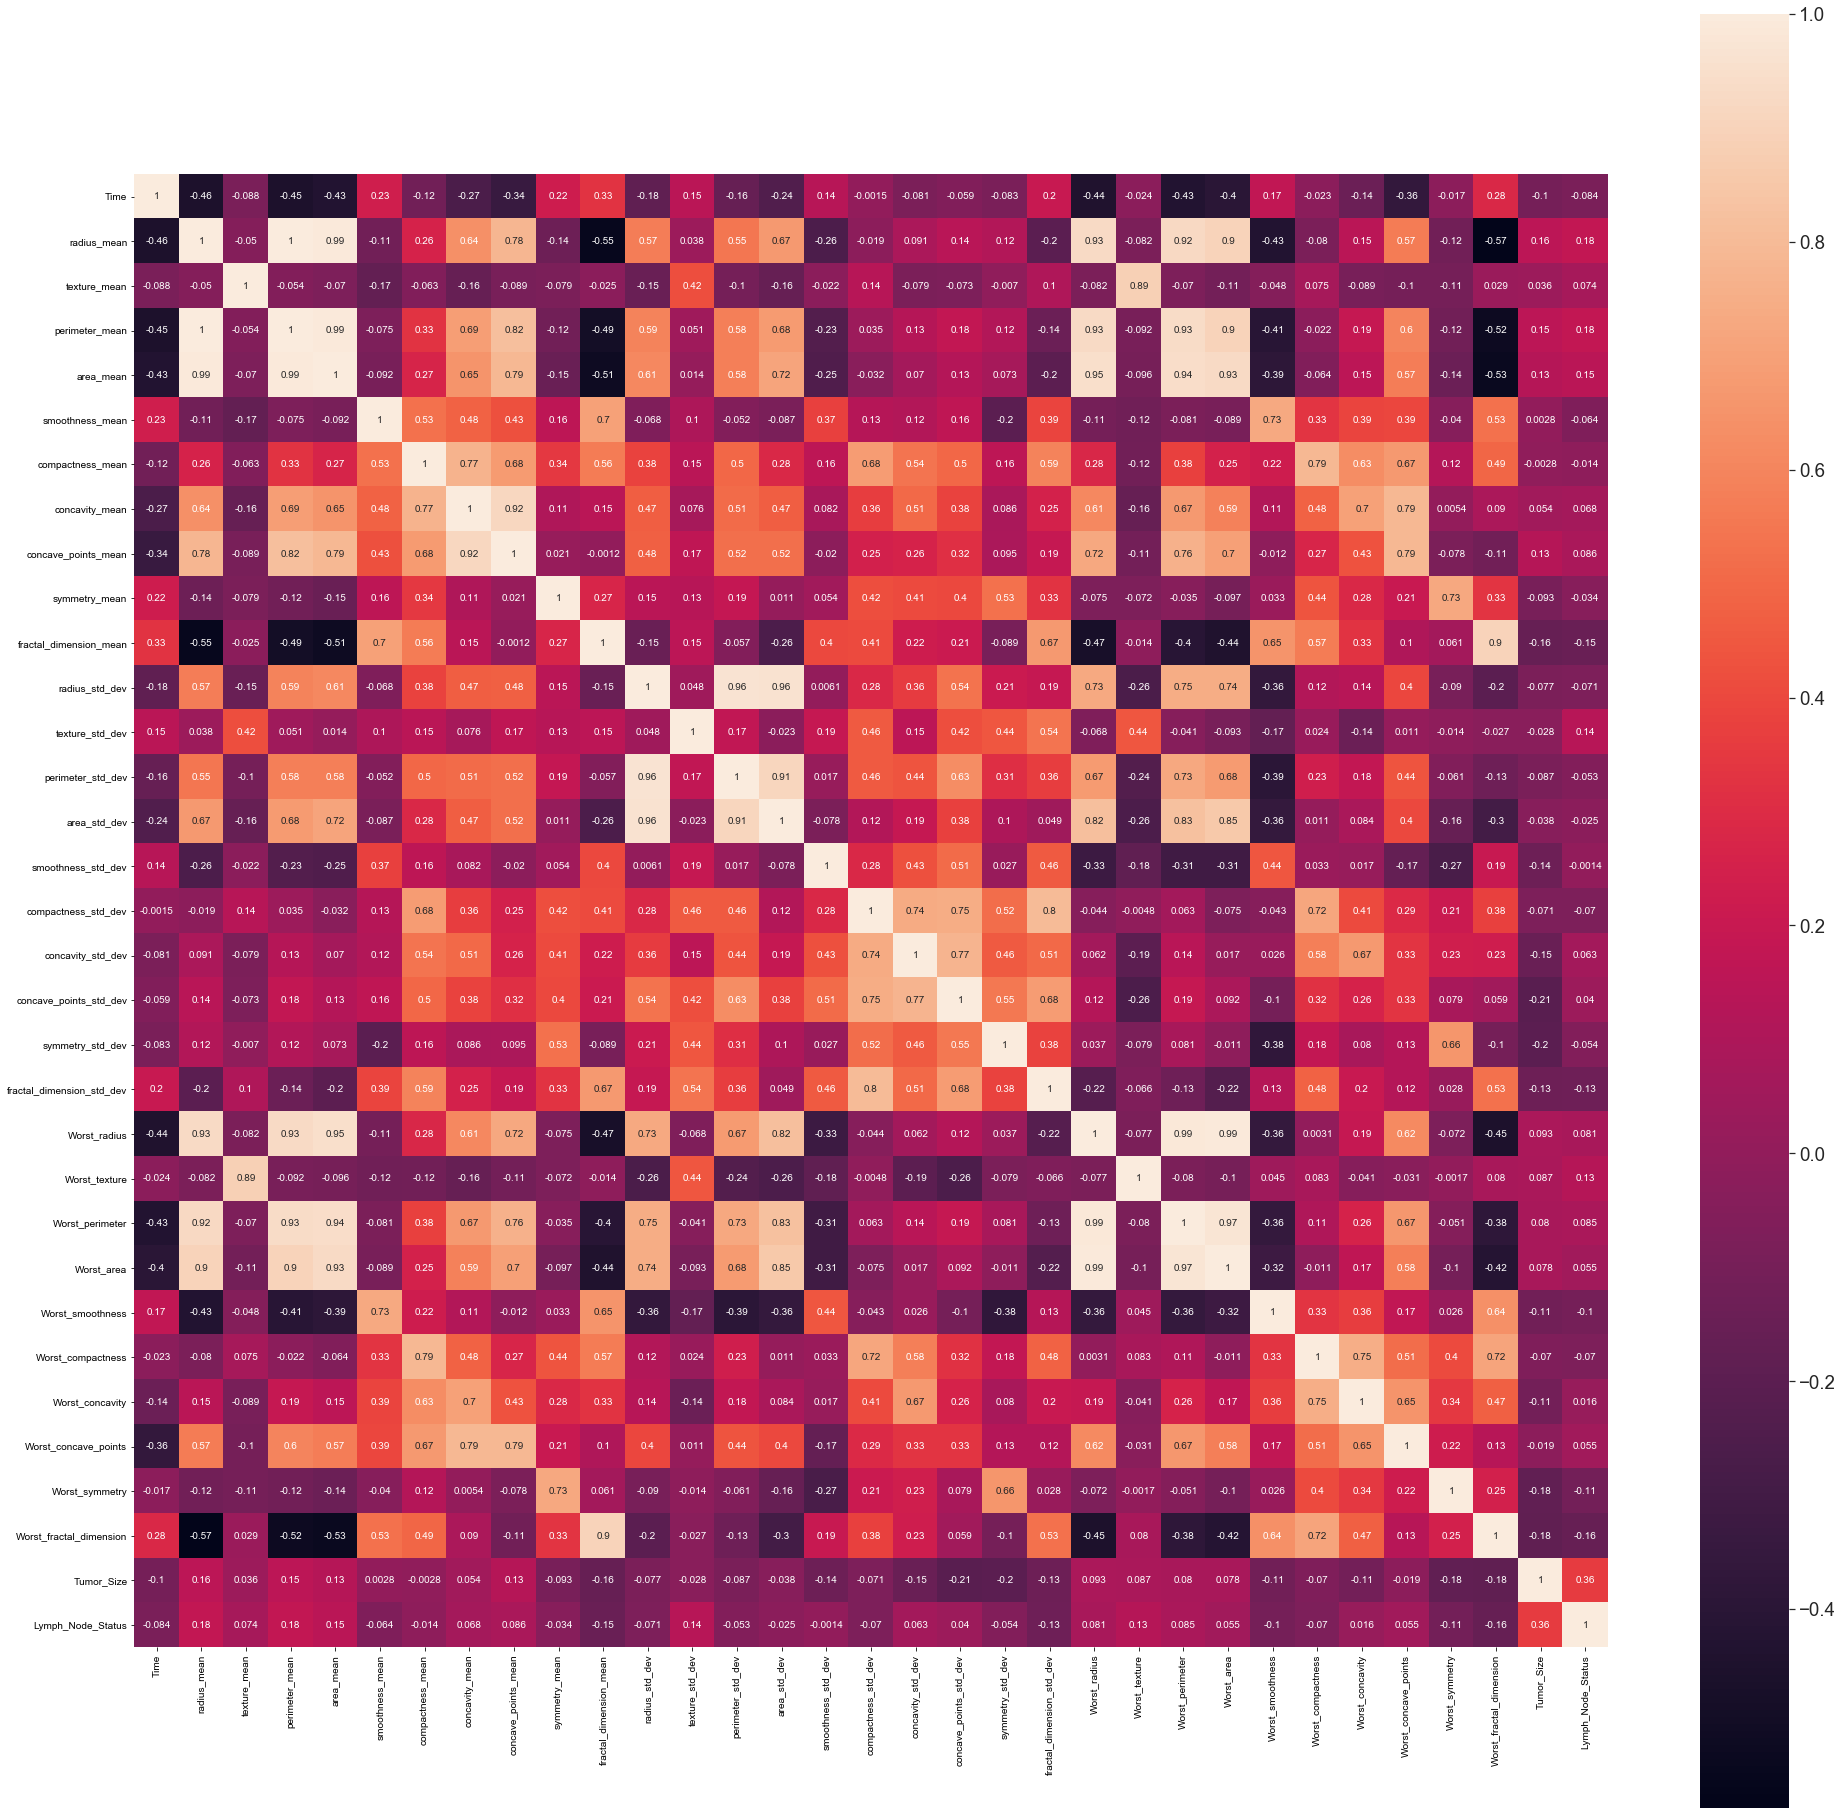

In [9]:
#For building Model let's do some analysis first .We begin by building a correlation heatmap.
#We will be checking attributes which are very highly corelated to time both positively and nengatively.
fig = plt.subplots(figsize = (33, 33))
sns.set(font_scale=1.7)
sns.heatmap(dataset.corr(),square = True , cbar=True , annot=True , annot_kws = {'size': 10} )
plt.savefig("Correlation_All_Attributes.png")

## Building Models

In [ ]:
# Choosing radius_mean as attribute as it is highly negatively corelated with time .
# (1.) radius_mean (2.) perimeter_mean (3.) area_mean  (4.)worst_radius (5.)worst_perimeter (6.)worst_concave_point (7.)Worst_smoothness
 # Now choosing radius_mean as attribute for my predictor 

In [10]:
one_attr_dataset_lin = dataset[['radius_mean']] #linear
#--------------------------------------------------------
one_attr_dataset_log = data[['radius_mean']]    #logistic

print(one_attr_dataset_lin.shape)
print(one_attr_dataset_log.shape)

(46, 1)
(194, 1)


In [11]:
#Next, for the feature engineered model we drop the predictors that are highly correlated with other predictors to avoid the problems associated with multicollinearity.
drop_list = ['texture_mean', 'perimeter_mean', 'area_mean','compactness_mean', 'smoothness_mean', 'concavity_mean','symmetry_mean'
             ,'radius_std_dev','perimeter_std_dev', 'area_std_dev', 'texture_std_dev','compactness_std_dev', 'smoothness_std_dev',
             'concavity_std_dev', 'concave_points_std_dev','fractal_dimension_std_dev','symmetry_std_dev',
             'Worst_area','Worst_perimeter','Worst_compactness', 'Worst_concavity', 'Worst_fractal_dimension',
             'Worst_concave_points','Worst_symmetry','Worst_texture', 'Tumor_Size','Lymph_Node_Status']

In [12]:
feature_engineer_dataset_lin = dataset.drop(drop_list,axis = 1 ) #linear
#------------------------------------------------------------------------
feature_engineer_dataset_log = data.drop(drop_list,axis = 1 )   #logistic


In [13]:
#Standardizing all the features for linear
labels = feature_engineer_dataset_lin.pop('Time')

In [14]:
mapper_lin = DataFrameMapper([(feature_engineer_dataset_lin.columns, StandardScaler())])
scaled_features_lin = mapper_lin.fit_transform(feature_engineer_dataset_lin.copy(), 4)
scaled_features_df_lin = pd.DataFrame(scaled_features_lin, index=feature_engineer_dataset_lin.index, columns=feature_engineer_dataset_lin.columns)
scaled_features_df_lin.describe()

,radius_mean,concave_points_mean,fractal_dimension_mean,Worst_radius,Worst_smoothness
count,4.600000e+01,4.600000e+01,4.600000e+01,4.600000e+01,4.600000e+01
mean,-1.010363e-15,1.930823e-17,6.564797e-16,3.209993e-16,1.897033e-15
std,1.011050e+00,1.011050e+00,1.011050e+00,1.011050e+00,1.011050e+00
min,-1.799718e+00,-1.758806e+00,-1.754040e+00,-1.539127e+00,-2.230010e+00
25%,-8.031072e-01,-7.465950e-01,-7.723375e-01,-6.723460e-01,-8.027743e-01
50%,1.484418e-01,-1.435351e-01,-6.114484e-02,-1.677536e-01,7.522681e-02
75%,5.802813e-01,4.490790e-01,6.524560e-01,4.727940e-01,7.933569e-01
max,2.670385e+00,2.889125e+00,2.140663e+00,2.678169e+00,2.050407e+00


## Linear Regression

In [31]:
def build_and_evaluate_model(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    print('Coefficients: \n', regr.coef_)
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    print("The labels: \n", np.array(y_test).astype(int))
    print("The predicted values are: \n", y_pred.astype(int))

In [30]:
build_and_evaluate_model(one_attr_dataset_lin, labels)

Coefficients: 
 [-3.24702754]
Mean squared error: 223.75
The labels: 
 [ 9 12 37 14 49 12 10 26 48 36]
The predicted values are: 
 [23 30 31 29 36 28 34 42 37 39]
(10,)


In [33]:
build_and_evaluate_model(feature_engineer_dataset_lin, labels)

Coefficients: 
 [ 1.23368259e+00 -1.61054494e+02  1.41158684e+03 -1.66161798e+00
 -1.52751714e+02]
Mean squared error: 280.71
The labels: 
 [ 9 12 37 14 49 12 10 26 48 36]
The predicted values are: 
 [19 28 22 26 33 32 38 45 35 44]


## Logistic Regression 

In [34]:

mapper_log = DataFrameMapper([(feature_engineer_dataset_log.columns, StandardScaler())])
scaled_features_log = mapper_log.fit_transform(feature_engineer_dataset_log.copy(), 4)
scaled_features_df_log = pd.DataFrame(scaled_features_log, index=feature_engineer_dataset_log.index, columns=feature_engineer_dataset_log.columns)
scaled_features_df_log.describe()

,radius_mean,concave_points_mean,fractal_dimension_mean,Worst_radius,Worst_smoothness
count,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02
mean,-1.539433e-16,-4.521011e-16,-1.639010e-15,-9.645778e-16,-1.259302e-15
std,1.002587e+00,1.002587e+00,1.002587e+00,1.002587e+00,1.002587e+00
min,-2.039623e+00,-1.963047e+00,-1.718372e+00,-1.924796e+00,-2.814177e+00
25%,-7.427941e-01,-6.803797e-01,-8.287653e-01,-8.031174e-01,-6.623828e-01
50%,-3.550499e-02,-2.162911e-02,-1.413577e-01,-1.100378e-01,-9.850966e-02
75%,6.883798e-01,5.053123e-01,5.594610e-01,6.468005e-01,4.778435e-01
max,3.103436e+00,3.376921e+00,4.772626e+00,3.338830e+00,3.570636e+00


In [35]:
def build_and_evaluate_model(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    regr = linear_model.LogisticRegression(solver = "lbfgs", max_iter = 2000)
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    accuracy = regr.score(x_test, y_test)
    print("The accuracy of the model is " , accuracy * 100)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm,annot=True,fmt="d")
    print(#-----------------------------------------#
    )
    print (classification_report(y_test, y_pred))

The accuracy of the model is  82.05128205128204

              precision    recall  f1-score   support

           N       0.82      1.00      0.90        32
           R       0.00      0.00      0.00         7

    accuracy                           0.82        39
   macro avg       0.41      0.50      0.45        39
weighted avg       0.67      0.82      0.74        39


C:\Users\91959\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


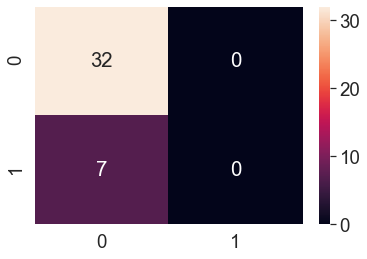

In [36]:
build_and_evaluate_model(one_attr_dataset_log, y)

The accuracy of the model is  89.74358974358975

              precision    recall  f1-score   support

           N       0.89      1.00      0.94        32
           R       1.00      0.43      0.60         7

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



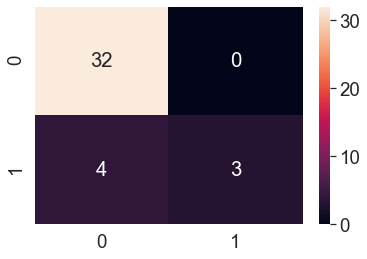

In [37]:
build_and_evaluate_model(scaled_features_df_log, y)